## Создание случайного графа

In [2]:
import networkx as nx
import numpy as np

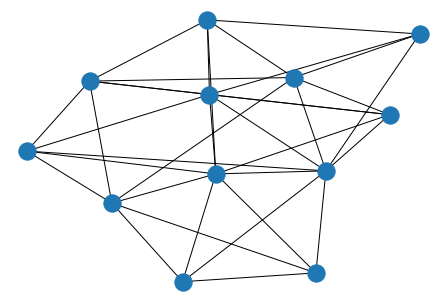

In [11]:
def flip(p):
    return np.random.random() < p

def all_pairs(nodes):
    for index1, node1 in enumerate(nodes):
        for index2, node2 in enumerate(nodes):
            if index1 < index2:
                yield node1, node2


def make_random_graph(size, p):
    nodes = range(size)
    g = nx.Graph()    
    g.add_nodes_from(nodes)

    for edge in all_pairs(nodes):
        if flip(p):
            g.add_edge(*edge)

    return g


g = make_random_graph(12, 0.5)
nx.draw(g)

## Поиск в ширину

In [12]:
from collections import deque

def bfs(g, start):
    seen = set()
    queue = deque([start])
    
    while queue:
        node = queue.popleft()
        if node not in seen:
            # actions with node
            
            seen.add(node)
            queue.extend(g.neighbors(node))

    return seen

## Поиск в глубину

In [21]:
def dfs(g, start):
    seen = set()
    stack = [start]
    
    while stack:
        node = stack.pop()
        if node not in seen:
            # actions with node
            
            seen.add(node)
            stack.extend(g.neighbors(node))
            
    return seen

## Алгоритм Дейкстры

Эдсгер В. Дейкстра – ​голландский ученый, который изобрел эффективный алгоритм кратчайшего пути

Алгоритм Дейкстры решает «проблему кратчайшего пути с одним источником», что означает, что
он находит минимальное расстояние от данного «исходного» узла до каждого другого узла в графе
(или, по крайней мере, каждого связного узла).